In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')
data.head()


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# Pandas Question

1. What is the minimum, median, max, and average salary for employee by Married Description and Gender.
Hints: use agg function<br>
Expected Output as below<br>
(5 Points)

In [ ]:
# 1. What is the minimum, median, max, and average salary for employee by Married Description and Gender
# Hints: use agg function
# Expected Output as below
# (5 Points)
import pandas as pd
df = pd.DataFrame(data)
# Assuming you have your data in a DataFrame named 'df'

# Grouping by 'MaritalDesc' and 'Sex' columns and calculating the desired statistics
grouped_data = df.groupby(['MaritalDesc', 'Sex'])['Salary'].agg(['min', 'median', 'max', 'mean'])

# Resetting the index to have 'MaritalDesc' and 'Sex' as columns instead of the index
grouped_data = grouped_data.reset_index()

# Renaming the columns for clarity
grouped_data.columns = ['MaritalDesc', 'Sex', 'min_salary', 'median_salary', 'max_salary', 'average_salary']

# Displaying the resulting DataFrame
print(grouped_data)

  MaritalDesc Sex  min_salary  median_salary  max_salary  average_salary
0    Divorced   F       45069        59393.0       68182    57345.500000
1    Divorced  M        45115        63738.5      148999    72520.857143
2     Married   F       45433        62662.0      250000    69638.986111
3     Married  M        46120        63370.5      157000    70089.038462
4   Separated   F       52984        60627.0       66149    60658.888889
5   Separated  M        64397        70468.0       74417    69760.666667
6      Single   F       45395        62068.0      220450    68988.266667
7      Single  M        46428        63055.5      178000    71340.048387
8     Widowed   F       45046        63303.5      107226    69719.750000
9     Widowed  M        52788        61359.0       67176    60670.500000


2. What is top-5 reason of termination?<br>
Expected Output as below<br>
(5 Points)

In [ ]:
#code here
import pandas as pd

# Assuming you have your data in a DataFrame named 'df'

# Grouping the data by 'TermReason' and counting the occurrences
termination_counts = df['TermReason'].value_counts()

# Selecting the top 5 reasons
termination = termination_counts.head(5)

# Renaming the columns for clarity
termination = termination.reset_index()
termination.columns = ['TermReason', 'total_termination']

# Displaying the top 5 termination reasons and their counts
print(termination)

          TermReason  total_termination
0  N/A-StillEmployed                207
1   Another position                 20
2            unhappy                 14
3         more money                 11
4      career change                  9


3. What is the highest number of employee by Recruitment Source that 'Exceeds' the Performance Score?
Hints: Use filter for Performance Score first. Don't forget to sort_values.<br>
Expected Output as below<br>
(5 Points)

In [ ]:
#code here

# Assuming you have your data in a DataFrame named 'df'

# Filter the data to include only employees with 'Exceeds' Performance Score
exceeds_performance = df[df['PerformanceScore'] == 'Exceeds']

# Group the filtered data by 'RecruitmentSource' and count the occurrences
recruitment_counts = exceeds_performance['RecruitmentSource'].value_counts()

# Sort the counts in descending order
sorted_recruitment_counts = recruitment_counts.sort_values(ascending=False)

# Rename the columns for clarity
sorted_recruitment_counts = sorted_recruitment_counts.reset_index()
sorted_recruitment_counts.columns = ['RecruitmentSource', 'total_recruit']

# Display the highest number of employees by recruitment source
print(sorted_recruitment_counts)

    RecruitmentSource  total_recruit
0              Indeed             12
1            LinkedIn              9
2  Diversity Job Fair              6
3   Employee Referral              5
4       CareerBuilder              2
5       Google Search              2
6             Website              1


**4**. How many managers in each department?
Hints: use nunique() as aggregation function.<br>
Expected Output as below.<br>
(5 Points)

In [ ]:
#code here

# Assuming you have your data in a DataFrame named 'df'

# Group the data by 'Department' and count the unique number of managers in each department
manager_count_by_department = df.groupby('Department')['ManagerName'].nunique().reset_index()

# Rename the columns for clarity
manager_count_by_department.columns = ['Department', 'ManagerCount']

# Display the number of managers in each department
print(manager_count_by_department)


             Department  ManagerCount
0         Admin Offices             3
1      Executive Office             1
2                 IT/IS             6
3     Production                   10
4                 Sales             4
5  Software Engineering             3


5. What is Termination Ratio by Gender?.
Hints: use value_counts(normalize=True).<br>
Expected Output as below.<br>
(5 Points)

In [ ]:
#code here

# Assuming you have your data in a DataFrame named 'df'

# Calculate the termination ratio by gender using value_counts(normalize=True)
termination_ratio_by_gender = df.groupby('Sex')['Termd'].value_counts(normalize=True).unstack(fill_value=0)

# Display the termination ratio by gender
print(termination_ratio_by_gender)
# Display the column names
print(termination_ratio_by_gender.columns)


Termd         0         1
Sex                      
F      0.659091  0.340909
M      0.674074  0.325926
Int64Index([0, 1], dtype='int64', name='Termd')


# Create an EDA and Data Visualization Question

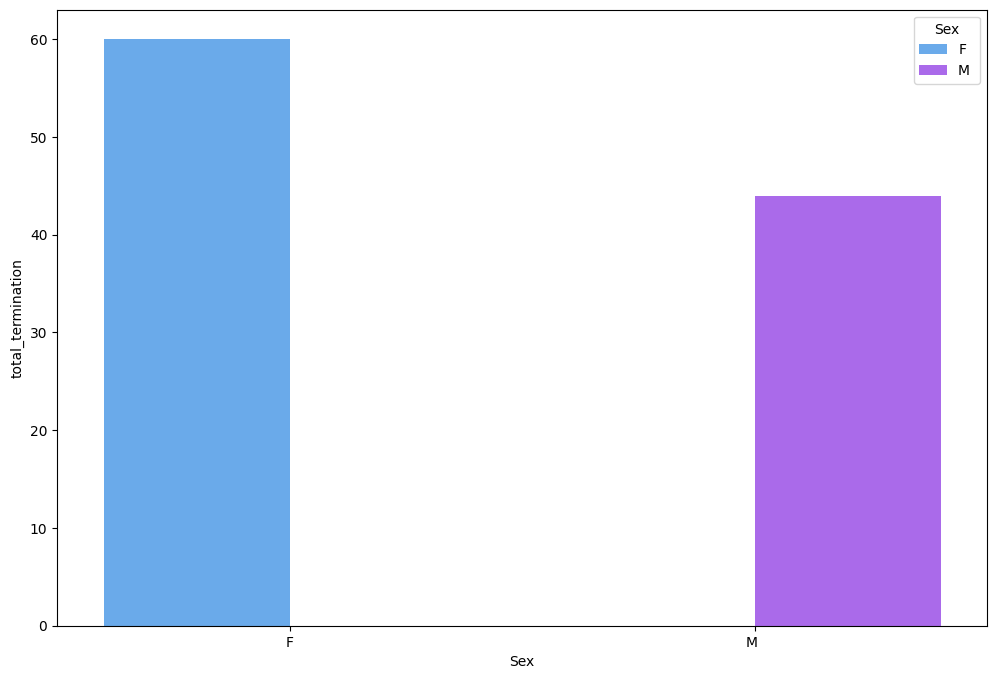

In [ ]:
#Sample Visualization, the example is not counted for the final score :p
#Create 5 visualization for better understanding on data
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

#Ratio termination by Gender

#Step1, get the data

term = data.groupby(by=['Sex'])\
                        .agg(total_termination=('Termd','sum')).reset_index()\

#Step2, Plot it
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Sex', y='total_termination', hue='Sex', data=term, palette='cool')

6. Buatlah Scatter plot antara kolom "Salary" dengan "EngagementSurvey", beri warna berbeda sesuai dengan status di "Termd"<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

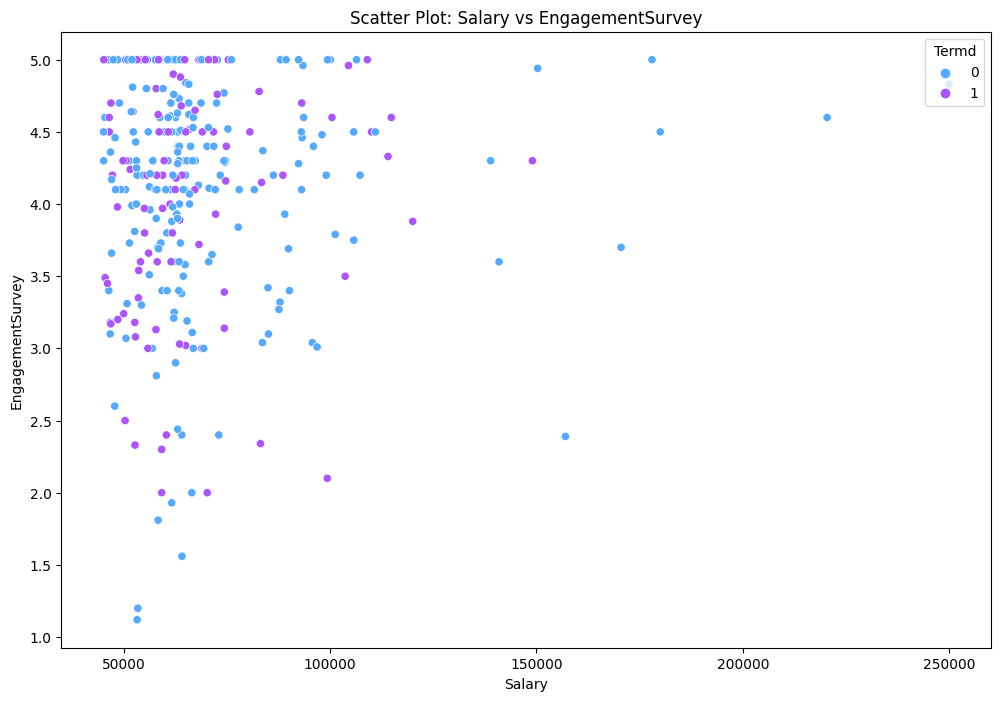

In [ ]:
#code here
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# Sample data
df = pd.DataFrame(data)
# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Salary', y='EngagementSurvey', hue='Termd', palette='cool')
plt.title('Scatter Plot: Salary vs EngagementSurvey')
plt.xlabel('Salary')
plt.ylabel('EngagementSurvey')
plt.legend(title='Termd', loc='upper right')
plt.show()


7. Buatlah visualisasi barchart untuk menghitung jumlah "termination of an employee's" berdasarkan department.<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

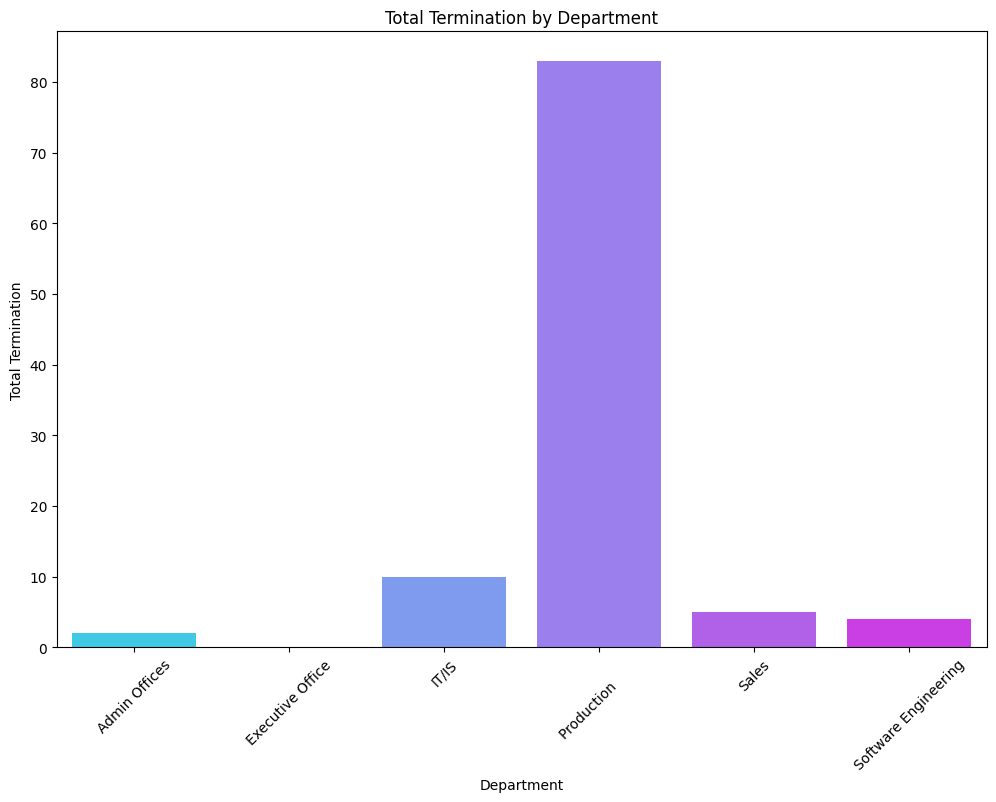

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Assuming you have your data in a DataFrame named 'data'

# Calculate the total termination by department
termination_by_department = data.groupby('Department')['Termd'].sum().reset_index()

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Department', y='Termd', data=termination_by_department, palette='cool')
plt.title('Total Termination by Department')
plt.xlabel('Department')
plt.ylabel('Total Termination')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


8. Buatlah visualisasi Pie Chart untuk melihat persentasi jumlah karyawan yang "terminated" berdasarkan kolom "Position".<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

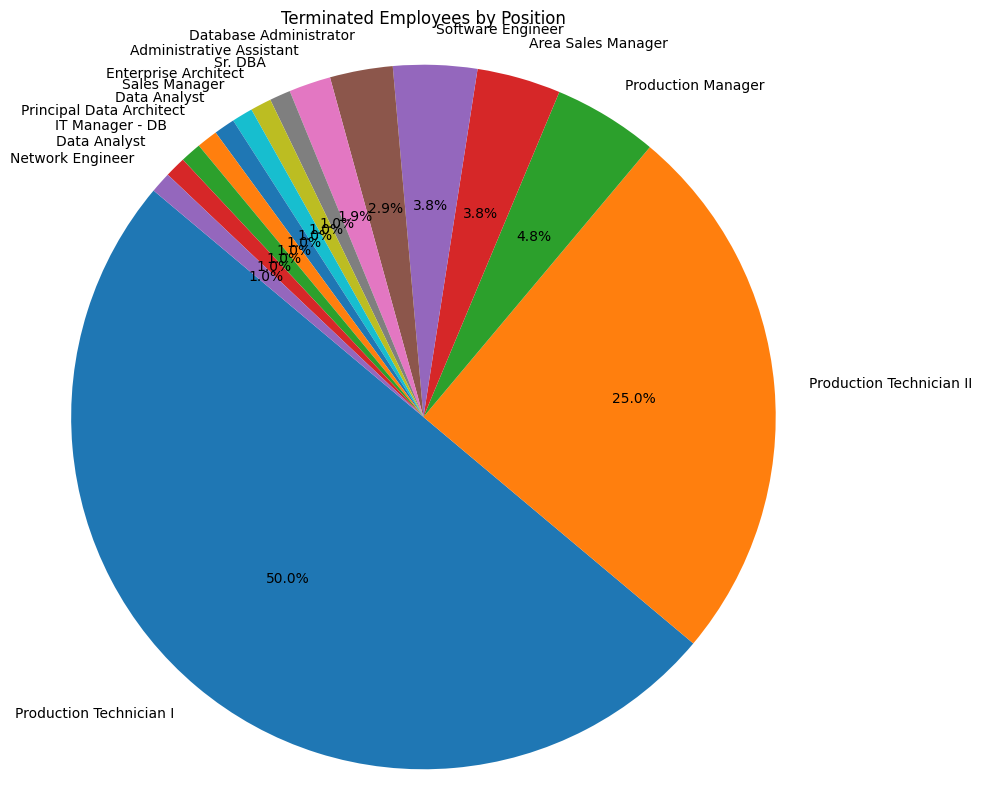

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have your data in a DataFrame named 'data'

# Filter the terminated employees
terminated_data = data[data['Termd'] == 1]

# Calculate the percentage of terminated employees by position
termination_by_position = terminated_data['Position'].value_counts(normalize=True)

# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(termination_by_position, labels=termination_by_position.index, autopct='%1.1f%%', startangle=140)
plt.title('Terminated Employees by Position')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


9. Buat Boxplot yang menggambarkan Salary berdasarkan Marital Desc, bedakan berdasarkan Termd
(5 points)

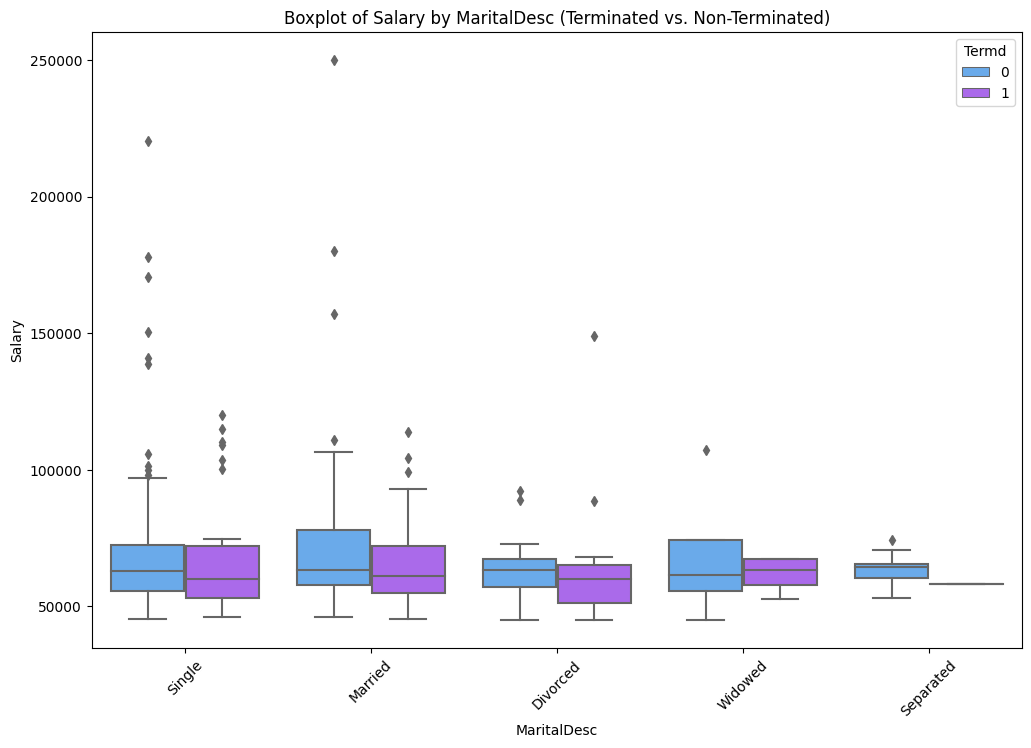

In [ ]:
#code here
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your data in a DataFrame named 'data'

# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='MaritalDesc', y='Salary', hue='Termd', palette='cool')
plt.title('Boxplot of Salary by MaritalDesc (Terminated vs. Non-Terminated)')
plt.xlabel('MaritalDesc')
plt.ylabel('Salary')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Termd', loc='upper right')
plt.show()


**10**. Tampilkan pairplot antara kolom 'Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences'
beri kategori warna berdasarkan 'Termd'<br>
(5points)

Pairplot


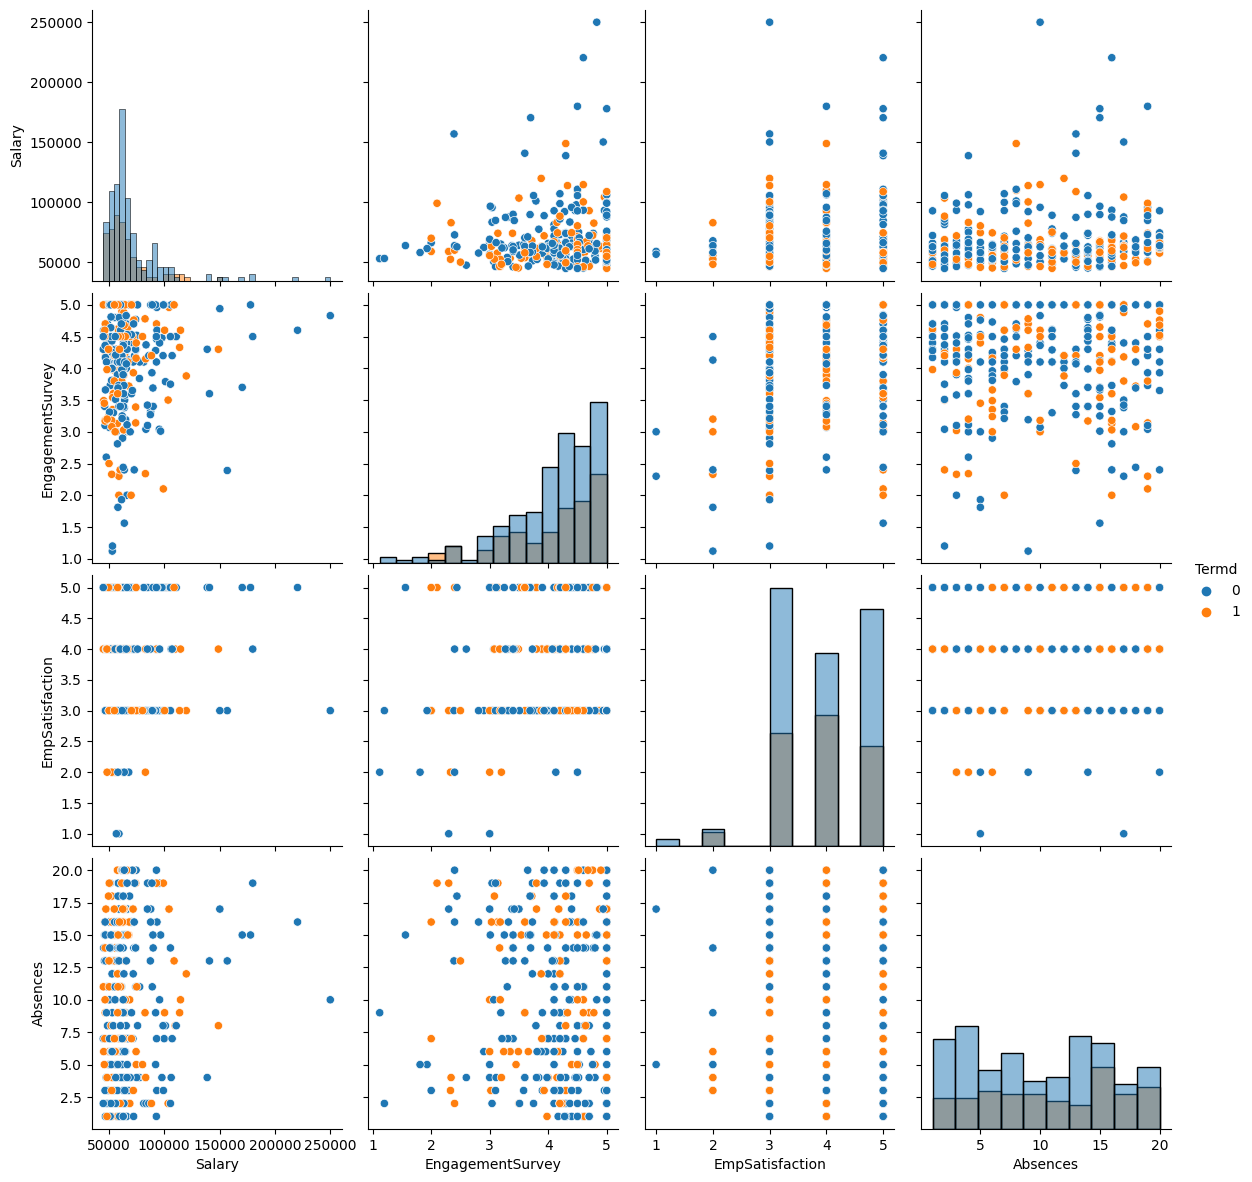

In [ ]:
#codde here
print('Pairplot')
sns.pairplot(data=data[['Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences', 'Termd']], hue='Termd', height=3, diag_kind="hist")
plt.show()

# Create Machine Learning Model to Predict Termd and Question

In [ ]:
#11. Buat fitur baru (kolom baru) berupa "Age" dalam satuan tahun. Untuk mendapatkannya, ambil data pada kolom DOB dikurangi dengan 2022
#(5 points)
import pandas as pd

# Assuming you have your data in a DataFrame named 'data'

# Convert the 'DOB' column to datetime
data['DOB_date'] = pd.to_datetime(data['DOB'], format='%m/%d/%y')

# Calculate the age by subtracting the birth year from 2022
data['Age'] = 2022 - data['DOB_date'].dt.year

# Display the resulting DataFrame with the 'Age' column
print(data[['DOB', 'DOB_date', 'Age']])


          DOB   DOB_date  Age
0    07/10/83 1983-07-10   39
1    05/05/75 1975-05-05   47
2    09/19/88 1988-09-19   34
3    09/27/88 1988-09-27   34
4    09/08/89 1989-09-08   33
..        ...        ...  ...
306  05/11/85 1985-05-11   37
307  05/04/82 1982-05-04   40
308  08/30/79 1979-08-30   43
309  02/24/79 1979-02-24   43
310  08/17/78 1978-08-17   44

[311 rows x 3 columns]


In [ ]:
#12. Lakukan MinMaxScaler dari fitur "Salary"
# (5 points)
from sklearn.preprocessing import MinMaxScaler
# Assuming you have your data in a DataFrame named 'data'

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'Salary' column
data['Salary_scaled'] = scaler.fit_transform(data[['Salary']])

# Display the resulting DataFrame with the scaled 'Salary' column
print(data[['Salary', 'Salary_scaled']])


     Salary  Salary_scaled
0     62506       0.085190
1    104437       0.289777
2     64955       0.097139
3     64991       0.097315
4     50825       0.028197
..      ...            ...
306   65893       0.101716
307   48513       0.016916
308  220450       0.855821
309   89292       0.215883
310   45046       0.000000

[311 rows x 2 columns]


In [ ]:
#13. Ubahlah semua tipe data object menjadi category
# 5 point
# Assuming you have your data in a DataFrame named 'data'

# Iterate through columns and convert object data types to category
for column in data.select_dtypes(include=['object']):
    data[column] = data[column].astype('category')

# Display the data types after conversion
print(data.dtypes)

Employee_Name                       category
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                            category
State                               category
Zip                                    int64
DOB                                 category
Sex                                 category
MaritalDesc                         category
CitizenDesc                         category
HispanicLatino                      category
RaceDesc                            category
DateofHire                          category
DateofTerm

In [ ]:
#Setelah diubah category

In [ ]:
#14. Ubahlah "RecruitmentSource" dengan menggunakana Label Encoder
# 5 point
from sklearn.preprocessing import LabelEncoder

# Assuming you have your data in a DataFrame named 'data'

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'RecruitmentSource' column
data['RecruitmentSource_encoded'] = label_encoder.fit_transform(data['RecruitmentSource'])

# Display the resulting DataFrame with the encoded 'RecruitmentSource' column
print(data[['RecruitmentSource', 'RecruitmentSource_encoded']])


#15. Ubahlah "PerformanceScore" dengan menggunakana Label Encoder
# 5 point
from sklearn.preprocessing import LabelEncoder
# Assuming you have your data in a DataFrame named 'data'

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'PerformanceScore' column
data['PerformanceScore_encoded'] = label_encoder.fit_transform(data['PerformanceScore'])

# Display the resulting DataFrame with the encoded 'PerformanceScore' column
print(data[['PerformanceScore', 'PerformanceScore_encoded']])


     RecruitmentSource  RecruitmentSource_encoded
0             LinkedIn                          5
1               Indeed                          4
2             LinkedIn                          5
3               Indeed                          4
4        Google Search                          3
..                 ...                        ...
306           LinkedIn                          5
307      Google Search                          3
308  Employee Referral                          2
309  Employee Referral                          2
310           LinkedIn                          5

[311 rows x 2 columns]
    PerformanceScore  PerformanceScore_encoded
0            Exceeds                         0
1        Fully Meets                         1
2        Fully Meets                         1
3        Fully Meets                         1
4        Fully Meets                         1
..               ...                       ...
306      Fully Meets                         1


In [ ]:
#16. Pisahkan dependent variable dan independent variable
# 5 point
# Assuming you have your data in a DataFrame named 'data'
import pandas as pd

# Independent variables (features)
independent_vars = data.drop(columns=['PerformanceScore'])

# Dependent variable (target)
dependent_var = data['PerformanceScore']

# Display the independent and dependent variables
print("Independent Variables:")
print(independent_vars)

print("\nDependent Variable:")
print(dependent_var)


#Dependent Varible (target)


#Independent Variable (feature)


Independent Variables:
                Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0         Adinolfi, Wilson  K  10026          0                0         1   
1    Ait Sidi, Karthikeyan     10084          1                1         1   
2           Akinkuolie, Sarah  10196          1                1         0   
3                Alagbe,Trina  10088          1                1         0   
4            Anderson, Carol   10069          0                2         0   
..                        ...    ...        ...              ...       ...   
306            Woodson, Jason  10135          0                0         1   
307        Ybarra, Catherine   10301          0                0         0   
308          Zamora, Jennifer  10010          0                0         0   
309               Zhou, Julia  10043          0                0         0   
310             Zima, Colleen  10271          0                4         0   

     EmpStatusID  DeptID  PerfScoreID  F

In [ ]:
#17. Bagi data menjadi Train-Test sebesar 80:20
# (5 points)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, precision_score, recall_score

# Independent variables (features)
X = data.drop(columns=['PerformanceScore'])

# Dependent variable (target)
y = data['PerformanceScore']

# Split the data into train and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of train and test sets
print("Train set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Test set shape (X_test, y_test):", X_test.shape, y_test.shape)


Train set shape (X_train, y_train): (248, 40) (248,)
Test set shape (X_test, y_test): (63, 40) (63,)


In [ ]:
#18. Lakukan pemodelan machine learning (metode klasifikasi bebas) untuk bisa memprediksi status "Termd". Lakukan evaluasi hasil dengan menampilkan
# score klasifikasi, precision dan recall.
# Gunakan model yang menurut kalian terbaik
# (5 points)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Baca data dari URL
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')

# Pemrosesan data
data.drop(['Employee_Name', 'EmpID', 'DateofTermination', 'TermReason'], axis=1, inplace=True)

# Encoding kolom kategorikal dengan LabelEncoder
categorical_cols = ['Sex', 'MaritalDesc', 'CitizenDesc', 'RaceDesc', 'Department', 'ManagerName', 'RecruitmentSource', 'EmploymentStatus']
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Pisahkan fitur dan target
X = data.drop('Termd', axis=1)
y = data['Termd']

# Bagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi pada data pengujian
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)


ValueError: ignored

# Insight (Answering the Question)

19.	Is there any relationship between who a person works for (their manager) and their performance score? (5 points)<br>
20.	What are our best recruiting sources if we want to ensure a low ratio of termination? (5 points)<br>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data (replace 'your_data.csv' with the actual file name)
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')

# Visualize the relationship between manager and performance score
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='ManagerName', Y='PerformanceScore', palette='viridis')
sns.set_xticklabels(rotation=90)  # Mengatur rotasi label pada sumbu x
plt.title('Relationship between Manager and Performance Score')
plt.show()


TypeError: ignored

<Figure size 1200x600 with 0 Axes>

In [ ]:
import pandas as pd

# Load your data (replace 'your_data.csv' with the actual file name)
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')

# Calculate termination ratio for each recruitment source
recruitment_ratio = data.groupby('RecruitmentSource')['Termd'].mean().reset_index()
recruitment_ratio = recruitment_ratio.rename(columns={'Termd': 'TerminationRatio'})

# Sort the sources by termination ratio (lowest to highest)
recruitment_ratio = recruitment_ratio.sort_values(by='TerminationRatio', ascending=True)

# Display the best recruitment source for low termination ratio
best_source = recruitment_ratio.iloc[0]
print("Best Recruitment Source for Low Termination Ratio:")
print(best_source)


Best Recruitment Source for Low Termination Ratio:
RecruitmentSource     Website
TerminationRatio     0.076923
Name: 8, dtype: object
